# Basic Machine Learning

In [284]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
from scipy.stats import zscore

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


%matplotlib inline
import matplotlib.pyplot as plt

## **Predict Cancer Mortality Rates in US Counties**

The provided dataset comprises data collected from multiple counties in the US. The regression task is to predict cancer mortality rates in "unseen" US counties, given some training data. The training data ('Training_data.csv') comprises various features/predictors related to socio-economic characteristics, amongst other types of information for specific counties in the country. The corresponding target variables for the training set are provided in a separate CSV file ('Training_data_targets.csv'). 


The list of predictors/features available in this data set are described below:

**Data Dictionary**

avgAnnCount: Mean number of reported cases of cancer diagnosed annually

avgDeathsPerYear: Mean number of reported mortalities due to cancer

incidenceRate: Mean per capita (100,000) cancer diagoses

medianIncome: Median income per county 

popEst2015: Population of county 

povertyPercent: Percent of populace in poverty 

MedianAge: Median age of county residents 

MedianAgeMale: Median age of male county residents 

MedianAgeFemale: Median age of female county residents 

AvgHouseholdSize: Mean household size of county 

PercentMarried: Percent of county residents who are married 

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school 

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma 

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college 

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree 

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma 

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree 

PctEmployed16_Over: Percent of county residents ages 16 and over employed 

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed 

PctPrivateCoverage: Percent of county residents with private health coverage 

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) 

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage 

PctPublicCoverage: Percent of county residents with government-provided health coverage 

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone 

PctWhite: Percent of county residents who identify as White 

PctBlack: Percent of county residents who identify as Black 

PctAsian: Percent of county residents who identify as Asian 

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian 

PctMarriedHouseholds: Percent of married households 

BirthRate: Number of live births relative to number of women in county 

In [10]:
#Reading
root_dir = "./"  
local_path = 'Data-for-students-regression/' 
data_dir = root_dir + local_path
print(data_dir)

## Defining paths to the training data and targets files
training_data_path = data_dir + 'Training_data.csv'
training_targets_path = data_dir + 'Training_data_targets.csv'

./Data-for-students-regression/


In [11]:
train_df = pd.read_csv(training_data_path) #storing the dataframes in a variable
train_target_df = pd.read_csv(training_targets_path)

In [12]:
train_df.head() #checking how our data looks

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,59.0,30,404.3,33975,8251,20.5,0.0,51.3,50.8,51.9,...,NaN,26.0,49.7,20.6,96.684036,0.438181,0.082899,0.272383,51.926207,5.041436
1,114.0,41,403.8,47363,22702,13.8,0.0,40.8,39.8,42.7,...,56.5,46.8,31.6,13.0,92.295459,2.102845,0.609648,0.879131,50.949545,6.329661
2,33.0,11,352.0,77222,9899,6.8,0.0,38.1,36.9,39.8,...,65.4,54.3,18.2,8.6,95.690422,0.000000,0.523871,0.118612,64.532156,5.148130
3,254.0,100,429.6,80650,48904,7.5,0.0,43.5,42.7,44.1,...,64.2,55.6,28.8,13.5,89.606996,7.407407,0.870370,0.450617,62.344481,5.627462
4,75.0,32,407.5,42839,22255,14.6,0.0,31.1,30.2,31.6,...,50.7,46.5,26.8,18.1,79.587990,2.948701,8.482564,5.637090,63.005948,10.436469


In [13]:
train_df.info() #checking the variable types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              2438 non-null   float64
 1   avgDeathsPerYear         2438 non-null   int64  
 2   incidenceRate            2438 non-null   float64
 3   medIncome                2438 non-null   int64  
 4   popEst2015               2438 non-null   int64  
 5   povertyPercent           2438 non-null   float64
 6   studyPerCap              2438 non-null   float64
 7   MedianAge                2438 non-null   float64
 8   MedianAgeMale            2438 non-null   float64
 9   MedianAgeFemale          2438 non-null   float64
 10  AvgHouseholdSize         2438 non-null   float64
 11  PercentMarried           2438 non-null   float64
 12  PctNoHS18_24             2438 non-null   float64
 13  PctHS18_24               2438 non-null   float64
 14  PctSomeCol18_24         

In [14]:
(train_df.shape)

(2438, 31)

In [15]:
train_target_df.head()

,TARGET_deathRate
0,199.5
1,137.1
2,126.9
3,173.8
4,179.8


In [16]:
train_target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TARGET_deathRate  2438 non-null   float64
dtypes: float64(1)
memory usage: 19.2 KB


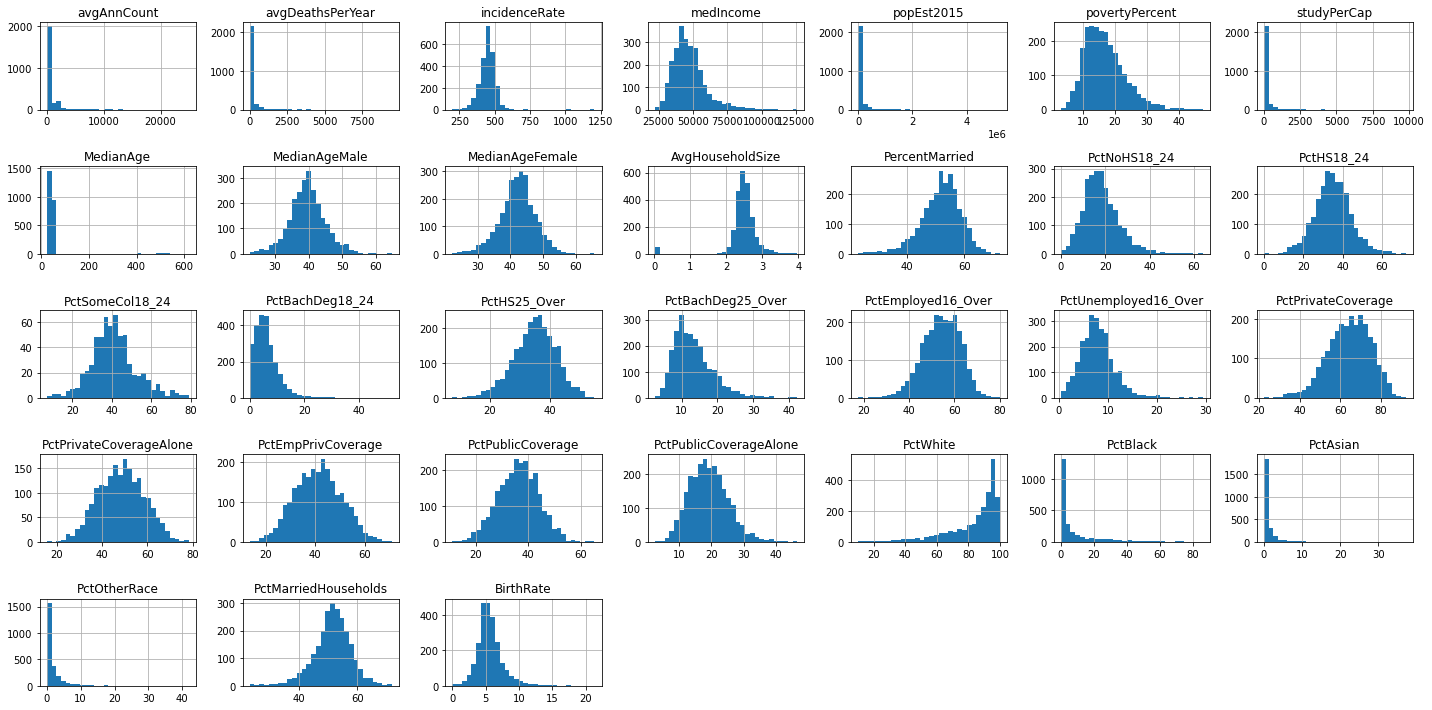

In [44]:
rows = (len(train_df) // 7) + (len(train_df) % 7 > 0)

fig, axes = plt.subplots(rows, 7, figsize = (20, rows * 2))

axes = axes.flatten()

for i, col in enumerate(train_df):
    train_df[col].hist(ax = axes[i], bins = 30)
    axes[i].set_title(col)
    
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout() 

So we can see that most of the features are normally distributed, variables like avgAnnCount, avgDeathsPerYear, popEst2015, studyPerCap, MedianAge, PctBachDeg18_24, PctBachDeg25_Over, PctWhite, PctBlack, PctAsian, PctOtherRace do not look normally distributed

array([[<AxesSubplot:title={'center':'TARGET_deathRate'}>]], dtype=object)

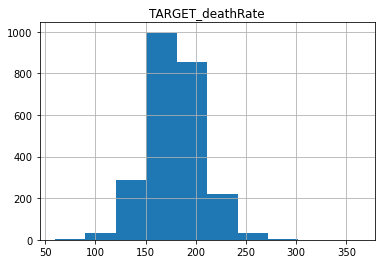

In [17]:
train_target_df.hist()

The target data is normally distributed

In [72]:
weird_hh = train_df['AvgHouseholdSize'] < 1
weird_hh.sum()

48

In [46]:
weird_age = train_df['MedianAge'] > 116
weird_age.sum()

26

So there are 48 AvgHouseholdSize that are less than one, which means that some of the recorded houses did not have anyone living in them which means that data has been entered incorrectly or there was an error when inputing the data.
There 26 MedianAge more than 116, which is the age of the oldest living person, which shows that these values are also not right as that indicates that there are multiple people who lived for more than 116 years.

In [47]:
train_df.corr()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
avgAnnCount,1.000000,0.925629,0.088404,0.295966,0.910858,-0.145403,0.075999,-0.023985,-0.133984,-0.132119,...,0.208581,0.217851,-0.186578,-0.098921,-0.142871,0.045622,0.439310,0.204692,-0.107790,-0.031411
avgDeathsPerYear,0.925629,1.000000,0.076366,0.245981,0.974260,-0.071766,0.058823,-0.026180,-0.161470,-0.157283,...,0.144992,0.174785,-0.143274,-0.027424,-0.198555,0.104501,0.452114,0.210216,-0.172902,-0.076740
incidenceRate,0.088404,0.076366,1.000000,0.019830,0.038854,-0.010297,0.073294,0.019980,-0.024107,-0.015706,...,0.132391,0.168991,0.028814,0.023177,-0.012179,0.107857,-0.011973,-0.199288,-0.153874,-0.124199
medIncome,0.295966,0.245981,0.019830,1.000000,0.267297,-0.784652,0.037892,-0.012710,-0.087333,-0.147572,...,0.779147,0.741325,-0.744017,-0.709009,0.167919,-0.268610,0.426370,0.085173,0.437030,-0.004586
popEst2015,0.910858,0.974260,0.038854,0.267297,1.000000,-0.072994,0.052051,-0.026258,-0.198905,-0.200520,...,0.156950,0.179444,-0.182054,-0.046586,-0.206948,0.094921,0.487013,0.241378,-0.140816,-0.058970
povertyPercent,-0.145403,-0.071766,-0.010297,-0.784652,-0.072994,1.000000,-0.056412,-0.027553,-0.225951,-0.161110,...,-0.755880,-0.680170,0.637825,0.791595,-0.521309,0.514039,-0.146852,0.048187,-0.608710,-0.007939
studyPerCap,0.075999,0.058823,0.073294,0.037892,0.052051,-0.056412,1.000000,-0.024928,-0.028683,-0.026551,...,0.068951,0.097108,-0.051375,-0.060180,0.023590,-0.015154,0.050457,-0.012287,-0.053582,0.013642
MedianAge,-0.023985,-0.026180,0.019980,-0.012710,-0.026258,-0.027553,-0.024928,1.000000,0.120028,0.114730,...,-0.022527,-0.040283,0.044408,-0.000778,0.030499,-0.015966,-0.035611,-0.022336,0.013293,-0.010819
MedianAgeMale,-0.133984,-0.161470,-0.024107,-0.087333,-0.198905,-0.225951,-0.028683,0.120028,1.000000,0.933590,...,-0.160092,-0.200032,0.400369,-0.008339,0.410732,-0.246943,-0.238355,-0.271889,0.231655,-0.119879
MedianAgeFemale,-0.132119,-0.157283,-0.015706,-0.147572,-0.200520,-0.161110,-0.026551,0.114730,0.933590,1.000000,...,-0.204603,-0.243926,0.455809,0.035296,0.356317,-0.161982,-0.262634,-0.272233,0.175597,-0.116227


In [50]:
#we find the features that have the highest correlation
corr_feat = {}
for feat, feature in train_df.items():
    target = train_target_df.squeeze()
    correlation = feature.corr(target)
    corr_feat[feat] = abs(correlation)
sorted_corr_feat = dict(sorted(corr_feat.items(), key = lambda item: item[1], reverse = True))

In [51]:
sorted_corr_feat

{'PctBachDeg25_Over': 0.49141088348272244,
 'incidenceRate': 0.44398325045239007,
 'PctPublicCoverageAlone': 0.4397339266743923,
 'medIncome': 0.416606804989592,
 'povertyPercent': 0.41326005865421833,
 'PctHS25_Over': 0.4099154744122088,
 'PctEmployed16_Over': 0.4003168080780501,
 'PctPublicCoverage': 0.3918993715796028,
 'PctPrivateCoverage': 0.38278606787668445,
 'PctUnemployed16_Over': 0.3626123846209571,
 'PctPrivateCoverageAlone': 0.35504981746698683,
 'PctMarriedHouseholds': 0.2906447675528536,
 'PctBachDeg18_24': 0.28456615620732645,
 'PctHS18_24': 0.26628478504560227,
 'PercentMarried': 0.26615294409212586,
 'PctEmpPrivCoverage': 0.2590060894954694,
 'PctBlack': 0.23638042232696993,
 'PctSomeCol18_24': 0.18613994490057045,
 'PctOtherRace': 0.18260203285858256,
 'PctAsian': 0.18194756801847342,
 'PctWhite': 0.17452114415320316,
 'avgAnnCount': 0.1500191674043368,
 'popEst2015': 0.13012246061830512,
 'avgDeathsPerYear': 0.09404755907149374,
 'PctNoHS18_24': 0.09056499653532299,


So according to correlation 'PctBachDeg25_Over', 'incidenceRate', 'PctPublicCoverageAlone', 'medIncome' and 'povertyPercent' are the top five features with strongest correlations to the targets

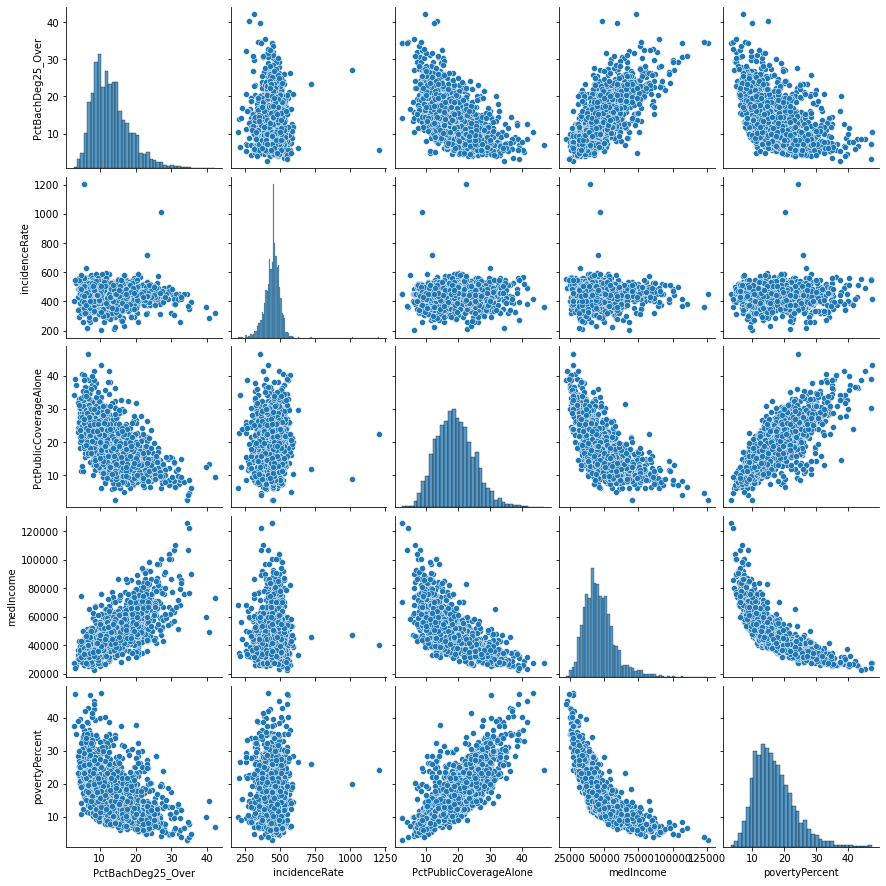

In [56]:
attributes = []
for i in range(5):
    attributes.append(list(sorted_corr_feat.keys())[i])
sns.pairplot(train_df[attributes])
plt.show()

So we check how the top five features correlate to each other

In [57]:
attributess = ["PctBachDeg25_Over", "incidenceRate", "PctPublicCoverageAlone", "medIncome", "povertyPercent" ]
corr_matrix=train_df[attributess].corr()
corr_matrix["PctPublicCoverageAlone"].sort_values(ascending = False)

PctPublicCoverageAlone    1.000000
povertyPercent            0.791595
incidenceRate             0.023177
PctBachDeg25_Over        -0.599208
medIncome                -0.709009
Name: PctPublicCoverageAlone, dtype: float64

In [58]:
corr_matrix["povertyPercent"].sort_values(ascending = False)

povertyPercent            1.000000
PctPublicCoverageAlone    0.791595
incidenceRate            -0.010297
PctBachDeg25_Over        -0.519242
medIncome                -0.784652
Name: povertyPercent, dtype: float64

In [59]:
corr_matrix["incidenceRate"].sort_values(ascending = False)

incidenceRate             1.000000
PctPublicCoverageAlone    0.023177
medIncome                 0.019830
povertyPercent           -0.010297
PctBachDeg25_Over        -0.024455
Name: incidenceRate, dtype: float64

In [60]:
corr_matrix["PctBachDeg25_Over"].sort_values(ascending = False)

PctBachDeg25_Over         1.000000
medIncome                 0.691206
incidenceRate            -0.024455
povertyPercent           -0.519242
PctPublicCoverageAlone   -0.599208
Name: PctBachDeg25_Over, dtype: float64

In [61]:
corr_matrix["medIncome"].sort_values(ascending = False)

medIncome                 1.000000
PctBachDeg25_Over         0.691206
incidenceRate             0.019830
PctPublicCoverageAlone   -0.709009
povertyPercent           -0.784652
Name: medIncome, dtype: float64

In [62]:
null_values = train_df.isnull().sum()

In [63]:
null_values2 = train_target_df.isnull().sum()

In [64]:
print(null_values2)

TARGET_deathRate    0
dtype: int64


No null values in the target df

In [65]:
print(null_values)

avgAnnCount                   0
avgDeathsPerYear              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            1829
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          119
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     483
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOtherRace                  0
PctMarriedHouseholds          0
BirthRate                     0
dtype: i

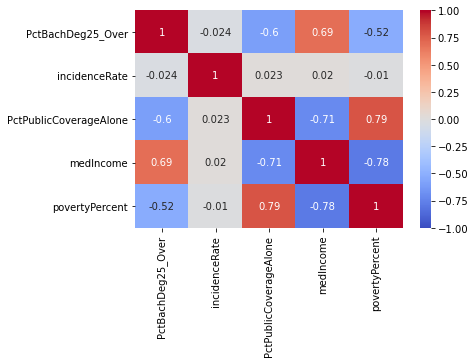

In [67]:
attributess = ["PctBachDeg25_Over", "incidenceRate", "PctPublicCoverageAlone", "medIncome", "povertyPercent" ]

sns.heatmap(train_df[attributess].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

# display the plot
plt.show()

In [77]:
#cant have households smaller than 1, only 48 rows
maskhh = train_df["AvgHouseholdSize"] >= 1

train_df = train_df[maskhh]
train_target_df = train_target_df[maskhh]

In [79]:
maska = train_df["MedianAge"] <= 116

train_df = train_df[maska]
train_target_df = train_target_df[maska]

So we remove all the unusual values so it doesn't affect the regression 

In [80]:
weird_hh = train_df['AvgHouseholdSize'] < 1
weird_hh.sum()

0

In [81]:
weird_age = train_df['MedianAge'] > 116
weird_age.sum()

0

## ML Pipeline

In [82]:
train_cancer, test_cancer, y_train, y_test = train_test_split(train_df, train_target_df, test_size = 0.2)

In [83]:
#Impute the null values and standardize the data
numerical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())])

In [84]:
X_train = numerical_transformer.fit_transform(train_cancer)

In [85]:
X_test = numerical_transformer.fit_transform(test_cancer)

In [86]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1891, 31)
(473, 31)
(1891, 1)
(473, 1)


### Different Ml models

First we try the normal Ordinary least Square(OLS) model

In [93]:
ols_model = LinearRegression()

ols_model.fit(X_train, y_train)

LinearRegression()

In [94]:
ols_pred = ols_model.predict(X_test)

ols_rmse = np.sqrt(mean_squared_error(y_test, ols_pred))

print("OLS RMSE:", ols_rmse)

OLS RMSE: 17.89145128250578


Then we try the Lasso model and use a parameter grid to find the best alpha values

In [95]:
lasso_model = Lasso(max_iter = 5000)

param_grid = {'alpha': np.logspace(-4, 2, 20)}
lasso_cv = GridSearchCV(lasso_model, param_grid, cv = 5)

lasso_cv.fit(X_train, y_train)

lasso_best = lasso_cv.best_estimator_

In [96]:
lasso_pred = lasso_best.predict(X_test)

lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))

print("Lasso RMSE:", lasso_rmse)

Lasso RMSE: 17.890957997028714


In [97]:
print("Best alpha for Lasso model:", lasso_cv.best_params_['alpha'])

Best alpha for Lasso model: 0.06951927961775606


Then we try the Ridge model and use a parameter grid to find the best alpha values

In [98]:
ridge_model = Ridge(max_iter = 5000)

param_grid = {'alpha': np.logspace(-4, 2, 20)}
ridge_cv = GridSearchCV(ridge_model, param_grid, cv = 5)

ridge_cv.fit(X_train, y_train)

ridge_best = ridge_cv.best_estimator_

In [99]:
ridge_pred = ridge_best.predict(X_test)

ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))

print("Ridge RMSE:", ridge_rmse)

Ridge RMSE: 17.919394938708145


In [100]:
print("Best alpha for Ridge model:", ridge_cv.best_params_['alpha'])

Best alpha for Ridge model: 100


So as we can see the Lasso model has the lowest Root Mean Squared Error of 17.8909 for the best value of alpha 0.0695

In [104]:
lasso_model1 = Lasso(alpha = lasso_cv.best_params_['alpha'])
lasso_model1.fit(X_train, y_train)

coef = lasso_model1.coef_

In [106]:
#so we find the best features according to the lasso model
feat_lasso = {}

for num_feat in range(X_train.shape[1]):
    lasso_mod = Lasso(alpha = lasso_cv.best_params_['alpha'])
    feat_train = X_train[:, num_feat].reshape(-1, 1)
    feat_test = X_test[:, num_feat].reshape(-1, 1)
    lasso_mod.fit(feat_train, y_train)
    coeff = lasso_mod.coef_
    feat_lasso[train_df.columns[num_feat]] = np.abs(coeff[0])

In [108]:
sorted_feat_lasso = dict(sorted(feat_lasso.items(), key = lambda item: item[1], reverse = True))
sorted_feat_lasso

{'PctBachDeg25_Over': 13.462720762247837,
 'incidenceRate': 12.23459462342411,
 'PctPublicCoverageAlone': 12.006550209822462,
 'povertyPercent': 11.657262957616288,
 'medIncome': 11.432430267664571,
 'PctHS25_Over': 11.061359939757615,
 'PctPrivateCoverage': 10.827890478156224,
 'PctPublicCoverage': 10.494212516457745,
 'PctEmployed16_Over': 10.32743428656593,
 'PctUnemployed16_Over': 9.944237714430919,
 'PctPrivateCoverageAlone': 8.80979094922609,
 'PctMarriedHouseholds': 8.009827932022066,
 'PctBachDeg18_24': 7.9246004308572,
 'PctHS18_24': 7.44714390713039,
 'PercentMarried': 7.321057517923945,
 'PctEmpPrivCoverage': 7.181529887256213,
 'PctBlack': 6.095241134375635,
 'PctOtherRace': 5.052630902463037,
 'PctAsian': 5.014851872865353,
 'PctWhite': 4.641210400364759,
 'avgAnnCount': 4.082883327876501,
 'popEst2015': 3.6022545657588063,
 'PctNoHS18_24': 3.185413688554623,
 'avgDeathsPerYear': 2.691903202852153,
 'BirthRate': 2.529049441485334,
 'PctSomeCol18_24': 2.4910859930181886,
 '

In [110]:
N_lasso = 5
out_lasso = dict(itertools.islice(sorted_feat_lasso.items(), N_lasso))
print("Top 5 features : " + str(out_lasso))

Top 5 features : {'PctBachDeg25_Over': 13.462720762247837, 'incidenceRate': 12.23459462342411, 'PctPublicCoverageAlone': 12.006550209822462, 'povertyPercent': 11.657262957616288, 'medIncome': 11.432430267664571}


In [112]:
y_train = y_train.squeeze() #to avoid the warning 

Next we try a Random Forest Regressor model

In [262]:
forest_reg_model = RandomForestRegressor()

param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, None],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4], 'max_features': ['sqrt', "log2", None]}
forest_cv = GridSearchCV(forest_reg_model, param_grid, cv = 5, scoring = 'neg_mean_squared_error', verbose = 2)
forest_cv.fit(X_train, y_train)

forest_best = forest_cv.best_estimator_

forest_best_pred = forest_best.predict(X_test)

forest_rmse = np.sqrt(mean_squared_error(y_test, forest_best_pred))

print(f"Best Parameters: {forest_cv.best_params_}")
print("Best Random Forest RMSE:", forest_rmse)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   3.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   3.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   5.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   5.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   5.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   5.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   5.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   1.7s
[CV] END max_depth=10, max_features=sqr

[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.5s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.5s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.7s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.6s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.4s
[CV] END max_depth=10, max_features=log2

[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   4.6s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   4.8s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   4.7s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   4.6s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   1.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   1.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   1.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   1.4s
[CV] END max_depth=10, max_features=

[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  21.7s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  21.5s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  21.4s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  21.3s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  21.2s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  31.9s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  31.6s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  31.6s
[CV] END max_depth=10, max_features=None

[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=  29.1s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   9.2s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   9.1s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   9.1s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   9.2s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   9.3s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=  18.4s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=  18.3s
[CV] END max_depth=10, max_featur

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   6.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   6.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   6.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   6.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   6.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.7s
[CV] END max_depth=20, max_features=sqrt

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   1.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   1.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   1.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   3.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   2.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   2.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   2.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   2.9s
[CV] END max_depth=20, max_featu

[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   5.3s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   5.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   5.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   5.3s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.5s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.4s
[CV] END max_depth=20, max_features=log2

[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   2.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   2.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   2.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   2.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   2.3s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   3.6s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   3.6s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   3.6s
[CV] END max_depth=20, max_featu

[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  32.3s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   9.0s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   9.0s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   9.1s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   9.5s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   9.2s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  18.2s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  18.2s
[CV] END max_depth=20, max_features=None

[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=  15.1s
[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=  15.7s
[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=  22.9s
[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=  23.8s
[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=  22.9s
[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=  23.1s
[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=  23.2s
[CV] END max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   6.9s
[CV] END max_depth=20, max_featur

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   3.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   3.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   3.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   4.1s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   2.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   2.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   4.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   4.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   4.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   4.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   4.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END max_dept

[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   2.9s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   2.9s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   3.0s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   2.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   2.3s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   2.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   3.5s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   3.7s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   3.6s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   3.6s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   3.7s
[CV] END max_dep

[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  32.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   9.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   9.7s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   9.3s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   8.8s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   9.2s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  19.2s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  18.1s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=  14.9s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=  15.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=  14.4s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=  15.8s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=  22.4s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=  23.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=  22.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=  22.3s
[CV] END max_dep

So the Random Forest Regressor Model has an RMSE of 17.9240 


In [263]:
feat_importance = forest_best.feature_importances_

feat_forest = {train_df.columns[i]: feat_importance[i] for i in range(len(feat_importance))}

In [264]:
sorted_feat_forest = dict(sorted(feat_forest.items(), key = lambda item: item[1], reverse = True))
sorted_feat_forest

{'PctBachDeg25_Over': 0.21513251328583144,
 'incidenceRate': 0.20598411848113016,
 'medIncome': 0.0556978685213139,
 'PctHS25_Over': 0.042401180485727885,
 'avgDeathsPerYear': 0.035296524538723256,
 'PctPublicCoverageAlone': 0.03392768192435016,
 'povertyPercent': 0.029688456548387906,
 'PctEmployed16_Over': 0.024508385598516827,
 'PctOtherRace': 0.02249166511757954,
 'PctPrivateCoverage': 0.02212234634595165,
 'PctHS18_24': 0.02195054081008889,
 'PctBlack': 0.021454640586287148,
 'PctUnemployed16_Over': 0.020799761338151937,
 'popEst2015': 0.020778872353206905,
 'PctMarriedHouseholds': 0.020025288476130675,
 'PercentMarried': 0.019394685217127238,
 'PctAsian': 0.019294273713501026,
 'BirthRate': 0.019243655289573808,
 'AvgHouseholdSize': 0.018656930764903944,
 'PctWhite': 0.016206163375199346,
 'avgAnnCount': 0.016051282399150074,
 'PctNoHS18_24': 0.015920397300974123,
 'PctBachDeg18_24': 0.015294818052090592,
 'MedianAgeFemale': 0.013109633984667026,
 'PctEmpPrivCoverage': 0.01056031

In [265]:
N_forest = 5
out_forest = dict(itertools.islice(sorted_feat_forest.items(), N_forest))
print("Top 5 features : " + str(out_forest))

Top 5 features : {'PctBachDeg25_Over': 0.21513251328583144, 'incidenceRate': 0.20598411848113016, 'medIncome': 0.0556978685213139, 'PctHS25_Over': 0.042401180485727885, 'avgDeathsPerYear': 0.035296524538723256}


So as we can see according to the **Random Forest Regressor model** the top 5 features are *'PctBachDeg25_Over', 'incidenceRate', 'medIncome', 'PctHS25_Over'* and *'avgDeathsPerYear'*. 

Which is different from the top 5 features according to the **Lasso model** :*'PctBachDeg25_Over', 'incidenceRate', 'PctPublicCoverageAlone', 'povertyPercent'* and *'medIncome'*.

But according to **Correlation** *'PctBachDeg25_Over', 'incidenceRate', 'PctPublicCoverageAlone', 'medIncome' and 'povertyPercent'* are the top 5 features with strongest correlations to the targets.

So all three models show agree that *'PctBachDeg25_Over', 'incidenceRate'* and *'medIncome'* are the top 3 features which affect the target data.

## Test data

Now we use our trained models on an example test dataset to see how they perform

In [117]:
test_data_path = data_dir + 'Test_data_example.csv'
test_targets_path = data_dir + 'Test_data_example_targets.csv'

test_df = pd.read_csv(test_data_path)
test_target_df = pd.read_csv(test_targets_path)

In [154]:
test_target_df.head()

,TARGET_deathRate
0,181.2
1,173.4
2,148.4
3,213.5
4,155.2


In [118]:
test_cancer = numerical_transformer.fit_transform(test_df) 

First we try the Lasso model with the best parameters as it was the model with the lowest RMSE

In [266]:
predictions_lasso = lasso_best.predict(test_cancer)

mse_lasso = mean_squared_error(test_target_df, predictions_lasso)
final_rsme_lasso = np.sqrt(mse_lasso)
print("Root Mean squared error:", final_rsme_lasso)

Root Mean squared error: 23.0047982299095


In [267]:
predictions_lasso[:10] #chechking what it is predicting 

array([175.77849313, 179.83551337, 152.83162647, 192.20048776,
       146.71663916, 212.63535122, 178.82470351, 173.08615786,
       186.76293947, 194.56707753])

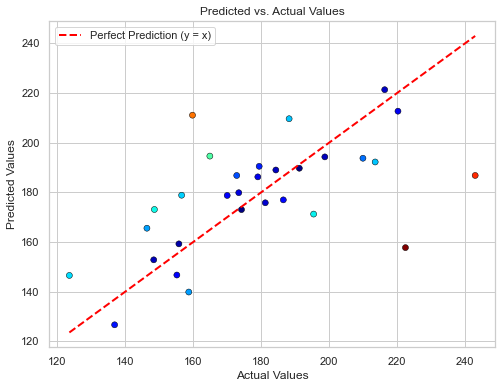

In [273]:
plt.figure(figsize = (8, 6))

errors = np.abs(test_target_df.squeeze() - predictions_lasso)

sns.scatterplot(x = test_target_df.squeeze(), y = predictions_lasso, c = errors, cmap = "jet", edgecolor = "black")

x_range = np.linspace(min(test_target_df.squeeze()), max(test_target_df.squeeze()), 100)
plt.plot(x_range, x_range, color = "red", linestyle = "--", linewidth = 2, label = "Perfect Prediction (y = x)")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")


plt.title("Predicted vs. Actual Values")
plt.legend()
plt.show()

As we can see from the graph the model is somewhat accurate, it does makes some errors but most of the predicted and actual values are closer

Next we try the Random Forest Regressor model

In [269]:
predictions_rf = forest_best.predict(test_cancer)

mse_rf = mean_squared_error(test_target_df, predictions_rf)
final_rsme_rf = np.sqrt(mse_rf)
print("Root Mean squared error:", final_rsme_rf)

Root Mean squared error: 21.188845625846565


Has a lower RMSE than the Lasso model on the test data

In [270]:
predictions_rf[:10]

array([184.88378019, 179.70654853, 154.23984067, 206.64892293,
       151.43182897, 210.44045056, 178.43639639, 186.56445754,
       189.21770505, 195.86103434])

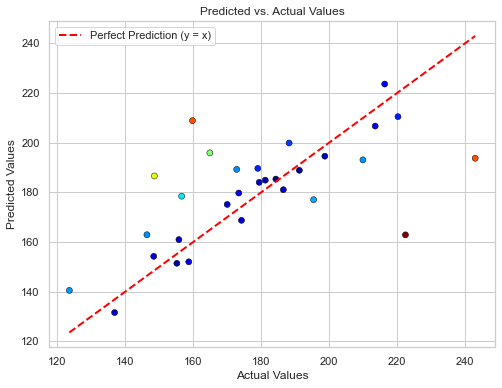

In [271]:
plt.figure(figsize = (8, 6))

errors = np.abs(test_target_df.squeeze() - predictions_rf)

sns.scatterplot(x = test_target_df.squeeze(), y = predictions_rf, c = errors, cmap = "jet", edgecolor = "black")

x_range = np.linspace(min(test_target_df.squeeze()), max(test_target_df.squeeze()), 100)
plt.plot(x_range, x_range, color = "red", linestyle = "--", linewidth = 2, label = "Perfect Prediction (y = x)")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")


plt.title("Predicted vs. Actual Values")
plt.legend()
plt.show()

As we can see it is performing better than the lasso model, most predicted values are closer to the actual values, although there is room for improvement

In [292]:
comparison_df = pd.DataFrame({
    "Actual": test_target_df.squeeze(), 
    "Predicted": predictions_rf
})

print(comparison_df)
#checking the actual values

    Actual   Predicted
0    181.2  184.883780
1    173.4  179.706549
2    148.4  154.239841
3    213.5  206.648923
4    155.2  151.431829
5    220.2  210.440451
6    156.6  178.436396
7    148.6  186.564458
8    172.8  189.217705
9    164.9  195.861034
10   123.6  140.526980
11   216.3  223.554286
12   136.9  131.610736
13   242.9  193.701683
14   179.4  183.996220
15   146.4  162.926634
16   209.9  193.037460
17   159.8  208.823357
18   170.0  175.113394
19   195.4  177.034676
20   184.3  185.327750
21   158.7  152.025979
22   188.2  199.827967
23   155.8  160.963943
24   191.2  188.844378
25   198.7  194.531085
26   179.0  189.619860
27   186.5  181.037683
28   222.4  162.876505
29   174.2  168.728183


# **Classification of 1-year patient mortality following a heart attack**

The provided data set contains data from patients who all suffered heart attacks at some point in the past. Some are still alive and some are not. The data provided contains key clinical information (features) for each patient and the prediction task involves identifying (classifying) which patients are likely to survive for at least one year following the heart attack.
The provided features (clinical variables) to be used as predictors by your classification models include the following:

    1. age-at-heart-attack -- age in years when heart attack occurred
    2. pericardial-effusion -- binary. Pericardial effusion is fluid
			      around the heart.  0=no fluid, 1=fluid
    3. fractional-shortening -- a measure of contracility around the heart
			       lower numbers are increasingly abnormal
    4. epss -- E-point septal separation, another measure of contractility.  
	      Larger numbers are increasingly abnormal.
    5. lvdd -- left ventricular end-diastolic dimension.  This is
	      a measure of the size of the heart at end-diastole.
	      Large hearts tend to be sick hearts.

    6. wall-motion-index -- equals wall-motion-score divided by number of
			   segments seen.  Usually 12-13 segments are seen
			   in an echocardiogram.  
               
The target variable is encoded as a binary outcome of whether a patient survived for 1 year post-heart attack or not. Label '0' indicates that the patient died within one year of a heart attack. Label '1' indicates that the patient survived for at least one year after a heart attack.

In [166]:
root_dir = './' 
local_path = 'Data-for-students-classification/'
data_dir = root_dir + local_path

data_features_path = data_dir + 'Heart-attack-data-predictors.csv'
data_targets_path = data_dir + 'Heart-attack-data-targets.csv'

In [167]:
heart_train_df = pd.read_csv(data_features_path)
heart_train_target_df = pd.read_csv(data_targets_path)

In [168]:
heart_train_df.head()

,AgeAtHeartAttack,PericardialEffusion,FractionalShortening,epss,lvdd,WallMotionIndex
0,71.0,0,0.260,9.000,4.600,1.00
1,72.0,0,0.380,6.000,4.100,1.70
2,55.0,0,0.260,4.000,3.420,1.00
3,60.0,0,0.253,12.062,4.603,1.45
4,57.0,0,0.160,22.000,5.750,2.25


In [169]:
heart_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AgeAtHeartAttack      126 non-null    float64
 1   PericardialEffusion   131 non-null    int64  
 2   FractionalShortening  124 non-null    float64
 3   epss                  117 non-null    float64
 4   lvdd                  121 non-null    float64
 5   WallMotionIndex       130 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 6.3 KB


In [170]:
heart_train_target_df.head()

,Target-class
0,0
1,0
2,0
3,0
4,0


In [171]:
heart_train_target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Target-class  131 non-null    int64
dtypes: int64(1)
memory usage: 1.1 KB


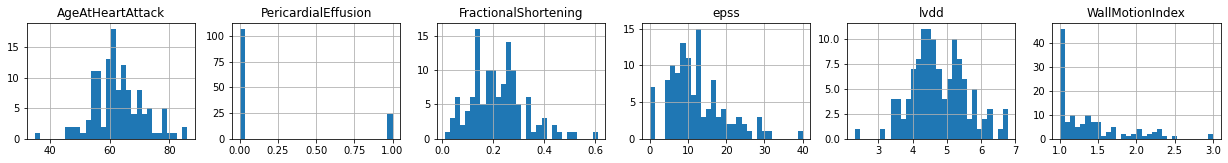

In [177]:
rows = (len(heart_train_df) // 7) + (len(heart_train_df) % 7 > 0)

fig, axes = plt.subplots(rows, 7, figsize = (20, rows * 2))

axes = axes.flatten()

for i, col in enumerate(heart_train_df):
    heart_train_df[col].hist(ax = axes[i], bins = 30)
    axes[i].set_title(col)
    
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout() 

As we can se most of the data is normally distributed, except for "WallMotionIndex" and "epss", along with "PEricardialEffusion" which has binary data in it

array([[<AxesSubplot:title={'center':'Target-class'}>]], dtype=object)

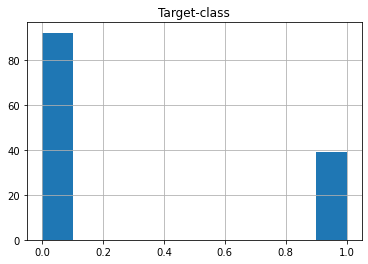

In [178]:
heart_train_target_df.hist()

In [179]:
print(heart_train_target_df["Target-class"] == 1)

0      False
1      False
2      False
3      False
4      False
       ...  
126     True
127    False
128    False
129    False
130    False
Name: Target-class, Length: 131, dtype: bool


In [180]:
new = heart_train_target_df.copy()

In [181]:
counts = new['Target-class'].value_counts()

print(counts)

Target-class
0    92
1    39
Name: count, dtype: int64


In [182]:
new2 = heart_train_df.copy()

In [183]:
counts2 = new2['PericardialEffusion'].value_counts()

print(counts2)

PericardialEffusion
0    107
1     24
Name: count, dtype: int64


In [228]:
nulll = heart_train_df.isnull().sum()
nulll

AgeAtHeartAttack         5
PericardialEffusion      0
FractionalShortening     7
epss                    14
lvdd                    10
WallMotionIndex          1
dtype: int64

In [229]:
nulo = heart_train_target_df.isnull().sum()
nulo

Target-class    0
dtype: int64

In [186]:
wfs = heart_train_df["FractionalShortening"] < 0.1
wfs.sum()

15

In [200]:
colls = heart_train_df.columns

colls = list(colls)
colls

['AgeAtHeartAttack',
 'PericardialEffusion',
 'FractionalShortening',
 'epss',
 'lvdd',
 'WallMotionIndex']

In [293]:
# for i in heart_train_df.columns:
#     colls = heart_train_df[i].dropna().to_numpy()

#     print(f"Column: {i}, Type: {type(colls)}, Shape: {colls.shape}, Dtype: {colls.dtype}")
#     print(colls[:5])  # Print first 5 elements to check

#     if colls.ndim != 1:
#         print(" Warning: colls is not 1D!") 

Making better plots for the data

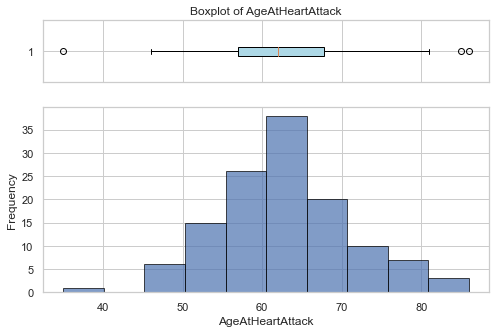

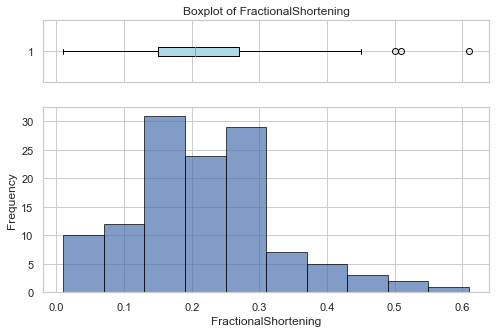

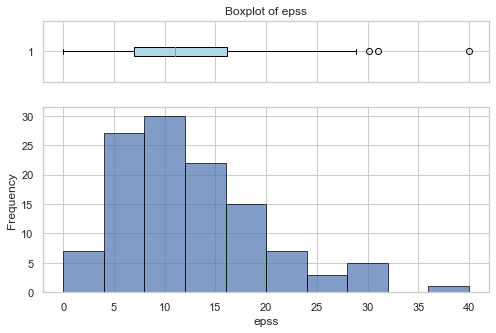

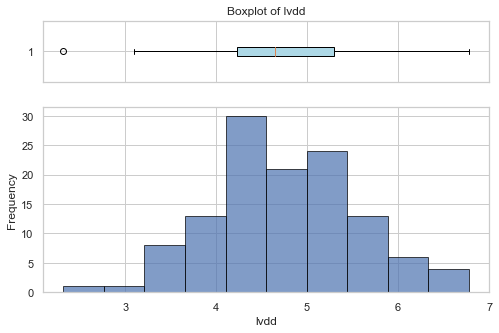

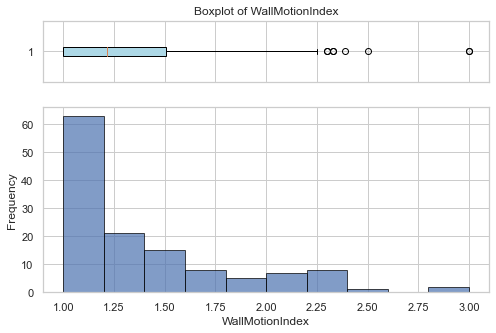

In [226]:
col = heart_train_df[["AgeAtHeartAttack", "FractionalShortening", "epss", "lvdd", "WallMotionIndex"]]
for i in col.columns:
    colls = col[i].dropna().astype(float)  
    
    fig, (ax_box, ax_hist) = plt.subplots(2, 1, sharex = True, figsize = (8, 5), gridspec_kw = {"height_ratios": [1, 3]})
    
    # Boxplot
    ax_box.boxplot(colls, vert = False, patch_artist = True, boxprops = dict(facecolor = 'lightblue'))
    ax_box.set_title(f"Boxplot of {i}")
    
    # Histogram
    ax_hist.hist(colls, bins = 10, edgecolor = 'black', alpha = 0.7)
    ax_hist.set_xlabel(i)
    ax_hist.set_ylabel("Frequency")
    
    plt.show()

As we can see from the boxplots, there are some outliers but I am not removing them as they are cases of people suffering from different types of heart conditions, which may or may not affect the target variable

## ML

In [227]:
train_heart, test_heart, Y_train, Y_test = train_test_split(heart_train_df, heart_train_target_df, test_size = 0.2)

In [230]:
x_train = numerical_transformer.fit_transform(train_heart)

In [231]:
x_test = numerical_transformer.fit_transform(test_heart)

In [232]:
print(x_train.shape)
print(x_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(104, 6)
(27, 6)
(104, 1)
(27, 1)


First we do Logistic Regression Without any Regularization

In [250]:
log_reg_no_reg = LogisticRegression()
log_reg_no_reg.fit(x_train, Y_train.squeeze())

y_pred_no_reg = log_reg_no_reg.predict(x_test)
acc_no_reg = accuracy_score(Y_test, y_pred_no_reg)
pres_no_reg = precision_score(Y_test, y_pred_no_reg)
recall_no_reg = recall_score(Y_test, y_pred_no_reg)

print("Accuracy without regularization: {:.4f}".format(acc_no_reg))
print("Precision no reg: {:.4f}".format(pres_no_reg))
print("Recall no reg: {:.4f}".format(recall_no_reg))

Accuracy without regularization: 0.7407
Precision no reg: 0.6667
Recall no reg: 0.4444


In [286]:
print(classification_report(Y_test, y_pred_no_reg))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82        18
           1       0.67      0.44      0.53         9

    accuracy                           0.74        27
   macro avg       0.71      0.67      0.68        27
weighted avg       0.73      0.74      0.72        27



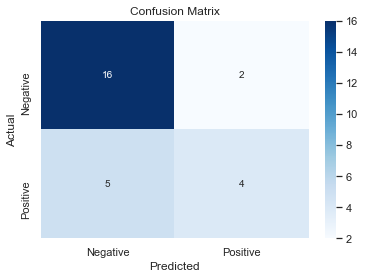

In [287]:
cm = confusion_matrix(Y_test, y_pred_no_reg)

# Plot the confusion matrix
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues", xticklabels = ["Negative", "Positive"], yticklabels = ["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

As we can see it correctly classifies 20 out of 27 test values

Next try Logistic Regression L1 Regularization, we also use a parameter grid to find the best parameters

In [254]:
param_grid_l1 = {'penalty': ['l1'],
              'C': np.logspace(-4, 2, 20)}
log_reg = LogisticRegression(solver = 'saga')


scoring = {'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall'}
grid_search_l1 = GridSearchCV(log_reg, param_grid_l1, cv = 5, n_jobs = -1, scoring = scoring, refit = 'accuracy')


grid_search_l1.fit(x_train, Y_train.squeeze())

best_model_l1 = grid_search_l1.best_estimator_

y_pred_l1 = best_model_l1.predict(x_test)

test_accuracy = accuracy_score(Y_test, y_pred_l1)
test_precision = precision_score(Y_test, y_pred_l1)
test_recall = recall_score(Y_test, y_pred_l1)

print("Test Accuracy with l1: {:.4f}".format(test_accuracy))
print("Test Precision with l1: {:.4f}".format(test_precision))
print("Test Recall with l1: {:.4f}".format(test_recall))

Test Accuracy with l1: 0.7407
Test Precision with l1: 0.7500
Test Recall with l1: 0.3333


In [288]:
print(classification_report(Y_test, y_pred_l1))

              precision    recall  f1-score   support

           0       0.74      0.94      0.83        18
           1       0.75      0.33      0.46         9

    accuracy                           0.74        27
   macro avg       0.74      0.64      0.65        27
weighted avg       0.74      0.74      0.71        27



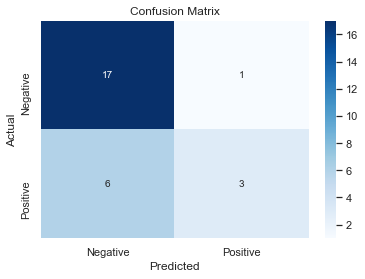

In [289]:
cm = confusion_matrix(Y_test, y_pred_l1)

# Plot the confusion matrix
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues", xticklabels = ["Negative", "Positive"], yticklabels = ["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

As we can see it produces similar results to the model without regularization 

Next try Logistic Regression L2 Regularization, we also use a parameter grid to find the best parameters

In [255]:
param_grid_l2 = {'penalty': ['l2'],
              'C': np.logspace(-4, 2, 20)}
log_reg = LogisticRegression(solver = 'saga')


scoring = {'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall'}
grid_search_l2 = GridSearchCV(log_reg, param_grid_l2, cv = 5, n_jobs = -1, scoring = scoring, refit = 'accuracy')


grid_search_l2.fit(x_train, Y_train.squeeze())

best_model_l2 = grid_search_l2.best_estimator_

y_pred_l2 = best_model_l2.predict(x_test)

test_accuracy = accuracy_score(Y_test, y_pred_l2)
test_precision = precision_score(Y_test, y_pred_l2)
test_recall = recall_score(Y_test, y_pred_l2)

print("Test Accuracy with l2: {:.4f}".format(test_accuracy))
print("Test Precision with l2: {:.4f}".format(test_precision))
print("Test Recall with l2: {:.4f}".format(test_recall))

Test Accuracy with l2: 0.7407
Test Precision with l2: 0.7500
Test Recall with l2: 0.3333


In [290]:
print(classification_report(Y_test, y_pred_l2))

              precision    recall  f1-score   support

           0       0.74      0.94      0.83        18
           1       0.75      0.33      0.46         9

    accuracy                           0.74        27
   macro avg       0.74      0.64      0.65        27
weighted avg       0.74      0.74      0.71        27



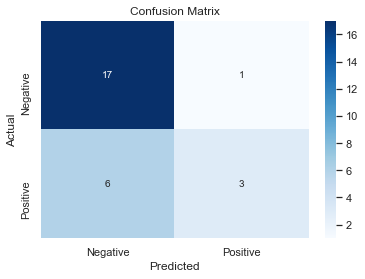

In [291]:
cm = confusion_matrix(Y_test, y_pred_l2)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

So as we can see both L1 and L2 Regularization give out the same results, identical accuracy, precision and recall as well

In [294]:
print("L1 Model Coefficients:\n", best_model_l1.coef_)
print("L2 Model Coefficients:\n", best_model_l2.coef_)

L1 Model Coefficients:
 [[ 0.46791848  0.29112824 -0.08600794  0.05731093  0.          0.48084806]]
L2 Model Coefficients:
 [[ 0.35792026  0.26560638 -0.14925665  0.13643368  0.02010304  0.34686097]]


But we can see that both the models have different coefficients, further L1 is also performing feature selection which it did by eliminating the least useful feature. And L2 did not remove any features instead it just shrinks the coefficients smoothly to prevent overfitting.

In [295]:
print("Best C for L1:", grid_search_l1.best_params_['C'])
print("Best C for L2:", grid_search_l2.best_params_['C'])

Best C for L1: 0.29763514416313164
Best C for L2: 0.06951927961775606


As the C for L1 is 0.29 it suggests that L1 did moderate regularization whereas C for L2 is 0.06 showing stronger regularization.

As both the models perfomed identical this suggests that the removed feature did not have any impact on the classification

We try Random Forest Classifier

In [274]:
rf = RandomForestClassifier()

param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, None],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4], 'max_features': ['sqrt', "log2", None]}
rf_cv = GridSearchCV(rf, param_grid, cv = 5, scoring = 'accuracy', verbose = 2)

rf_cv.fit(x_train, Y_train.squeeze())

rf_best = rf_cv.best_estimator_

y_pred_rf = rf_best.predict(x_test)

accuracy = accuracy_score(Y_test, y_pred_rf)
precision = precision_score(Y_test, y_pred_rf)
recall = recall_score(Y_test, y_pred_rf)

print("Test Accuracy with Random forest classifier: {:.4f}".format(accuracy))
print("Test Precision with Random forest classifier: {:.4f}".format(precision))
print("Test Recall with Random forest classifier: {:.4f}".format(recall))

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqr

[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END max_depth=10, max_features=log2

[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features

[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END max_depth=10, max_features=None

[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_featu

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END max_depth=20, max_featu

[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=log2

[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END max_depth=20, max_featu

[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=20, max_features=None

[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=No

[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.6s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=No

[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.6s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=No

In [279]:
comparison_df = pd.DataFrame({'Actual': Y_test.squeeze(), 'Predicted': y_pred_rf})

print(comparison_df)

     Actual  Predicted
102       0          0
96        0          0
20        1          1
29        0          0
86        1          1
34        0          0
6         0          1
39        0          0
10        1          0
79        0          0
92        0          0
98        1          0
33        0          0
59        0          0
41        0          0
48        1          1
14        1          0
38        0          0
68        0          0
99        0          0
27        0          0
114       0          0
78        0          0
69        1          1
17        1          1
115       0          0
107       1          0


In [282]:
print(classification_report(Y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87        18
           1       0.83      0.56      0.67         9

    accuracy                           0.81        27
   macro avg       0.82      0.75      0.77        27
weighted avg       0.82      0.81      0.80        27



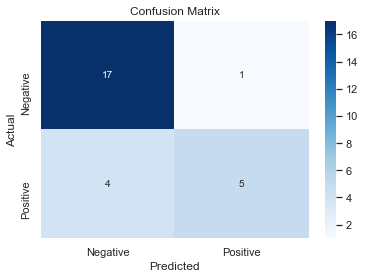

In [285]:
cm = confusion_matrix(Y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

As we can see the Random Forest Classifier performs better than the previous models with 22 out of 27 values classified correctly

In [296]:
feat_importance_for = rf_best.feature_importances_
feat_forest_for = {}
for num_feat in range(len(feat_importance_for)):
    feat_forest_for[heart_train_df.columns[num_feat]] = feat_importance_for[num_feat]

In [297]:
sorted_feat_forest_for = dict(sorted(feat_forest_for.items(), key = lambda item: item[1], reverse = True))
sorted_feat_forest_for

{'WallMotionIndex': 0.27437382357565837,
 'AgeAtHeartAttack': 0.20319777207400447,
 'FractionalShortening': 0.16843656207692634,
 'lvdd': 0.16083602149451615,
 'epss': 0.1445390435881935,
 'PericardialEffusion': 0.04861677719070123}

So according to the **Random Forest Classifier** the features in order of most relevancy are: *'WallMotionIndex', 'AgeAtHeartAttack', 'FractionalShortening', 'lvdd', 'epss' and 'PericardialEffusion'*